In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# kMeans

k-Means is an algorithm for finding clusters in a dataset.
These clusters can be analyzed further for a better understanding.

## Implementation of the k-Means algorithm

In [2]:
class kMeans:
    
    def __init__(self, n_clusters, n_init=10, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.n_init = n_init
        
    # compute the euclidean distance of two vektors
    @staticmethod
    def euclidean_distance(a, b):
        return (np.sqrt(np.sum(np.power(np.subtract(a,b),2))))      
    
    def find_centroids(self, X):
        m, n = X.shape
        # initialize centroids
        idxs = random.sample(range(m), self.n_clusters)
        new_centroids = np.take(X, idxs,axis=0)
        labels = np.zeros(m)
        
        # loop until best centroids are found
        for iteration in range(self.max_iter):
            old_centroids = np.copy(new_centroids)
            dissimilarity = 0    
            
            # calculate distance of each vector to the centroids
            for i in range(m):
                distances = []
                for e in new_centroids:
                    distances.append(kMeans.euclidean_distance(X[i,:], e))

                labels[i] = np.argmin(distances)
                dissimilarity = dissimilarity + (min(distances))**2
            
            # calculate new centroids
            for c in range(0,self.n_clusters):
                idxs = np.where(labels == c)
                C = X[idxs]
                new_centroids[c] = np.mean(C, axis=0)
            
            if((old_centroids == new_centroids).all()):
                break
                
        return new_centroids, dissimilarity
        
    def fit(self, X):
        best_centroids, best_dissimilarity = self.find_centroids(X)
        for t in range(self.n_init-1):
            C_centroids, C_dissimilarity = self.find_centroids(X)
            if C_dissimilarity < best_dissimilarity:
                best_centroids = C_centroids
                best_inertia = C_dissimilarity
                       
        self.inertia_ = best_dissimilarity
        self.cluster_centers_ = best_centroids
                
    def predict(self, X):
        # calculate distance of each vector to the centroids
        labels = []
        for vec in X:
            distances = []
            for e in self.cluster_centers_:
                distances.append(kMeans.euclidean_distance(vec, e))

            label = np.argmin(distances)
            labels.append(label)
        return np.asarray(labels)

## Try out the algorithm on a real dataset

As a dataset for testing the algorithm I chose the iris-dataset of sklearn.

In [3]:
from sklearn.datasets import load_iris
data = load_iris()

X=data.data
y=data.target

In [19]:
kmeans = kMeans(3)
kmeans.fit(X)
predictions = kmeans.predict(X)
centers = kmeans.cluster_centers_

visualize the found clusters with the centroids in red.

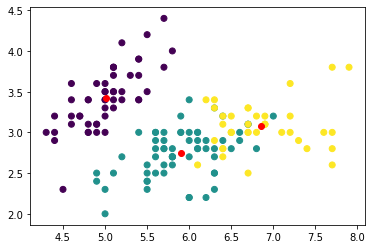

In [20]:
plt.scatter(X[:,0], X[:,1], c=predictions)
plt.scatter(centers[:,0], centers[:,1], c="red")

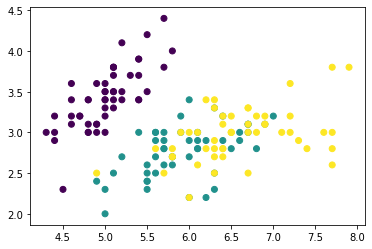

In [15]:
plt.scatter(X[:,0], X[:,1], c=y)

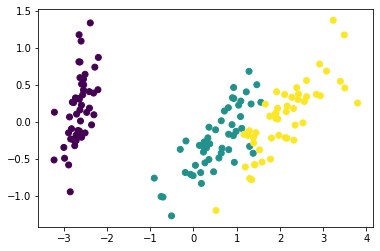

In [23]:
from sklearn.decomposition import PCA

pca = PCA(2)
components = pca.fit_transform(X)

plt.scatter(components[:,0], components[:,1], c=y)

After a deminesion reduction with pca down to two dimensions you can see that one cluster is clearly more seperated than the others.

## Conclusion

In the dataset are three different classes.

The algorithm finds one cluster very safely. On the other two clusters the algorithm is not so certain.